In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

%matplotlib widget
# Define the sigmoid function
def sigmoid(x):
    return np.tanh(x)

def z(x, w, b):
    return np.dot(x.T, w.T) - b

#define output of neuron
def output(x, win, wout, b):
    return np.dot(sigmoid(z(x, win, b)), wout.T)

# calculate loss function
def loss(x, win, wout, b):
    sum = 0
    for i in x.T:
        sum += (np.sign(i[0]*i[1]) - output(i, win, wout, b))**2

    return sum

# calculate gradient of win numerically
def grad_win1(x, win, wout, b):
    grad = np.zeros(win.shape)
    for i in range(win.shape[0]):
        for j in range(win.shape[1]):
            win[i][j] += 0.00000001
            grad[i][j] = (loss(x, win, wout, b) - loss(x, win - 0.00000001, wout, b))/0.00000001
            win[i][j] -= 0.00000001
    return grad

# calculate gradient of wout numerically
def grad_wout1(x, win, wout, b):
    grad = np.zeros(wout.shape)
    for i in range(wout.shape[0]):
        wout[i] += 0.00000001
        grad[i] = (loss(x, win, wout, b) - loss(x, win, wout - 0.00000001, b))/0.00000001
        wout[i] -= 0.00000001
    return grad

# calculate gradient of b numerically
def grad_b1(x, win, wout, b):
    grad = np.zeros(b.shape)
    for i in range(b.shape[0]):
        b[i] += 0.00000001
        grad[i] = (loss(x, win, wout, b) - loss(x, win, wout, b - 0.00000001))/0.00000001
        b[i] -= 0.00000001
    return grad


# update weights randomly
def update_weights(x, win, wout, b, lr):
    win = win + lr * grad_win1(x, win, wout, b)*random(win.shape)
    wout = wout + lr * grad_wout1(x, win, wout, b)*random(wout.shape)
    b = b + lr * grad_b1(x, win, wout, b)*random(b.shape)
    return win, wout, b

n_inputs = 2
n_hidden1 = 4

# generate data x0 ist x value, x1 is y value
xdata = np.random.uniform(-5, 5, (2, 100))

# random selection
def random(shape):
    return np.sign(np.random.uniform(-0.8, 0.2, shape))*0.5 + 0.5




#input weights
# first input neuron, second outout neuron
w1 = np.random.randn(n_inputs, n_hidden1).T
#bias
b1 = np.random.randn(n_hidden1)
#output weights
wOut = np.random.randn(n_hidden1)
counter = 0
print("loss before training: ", loss(xdata, w1, wOut, b1))
print("w1: ", w1)
print("wOut: ", wOut)
print("b1: ", b1)
print("grad_win1: ", grad_win1(xdata, w1, wOut, b1))
print("grad_wout1: ", grad_wout1(xdata, w1, wOut, b1))
print("grad_b1: ", grad_b1(xdata, w1, wOut, b1))

loss before training:  92.29910139548997
w1:  [[ 0.12546511  0.5504845 ]
 [-0.08830182 -1.31100646]
 [-0.66612432 -2.4378961 ]
 [ 0.70431987 -0.7548917 ]]
wOut:  [-1.06676123 -0.46282117 -0.52540156  0.35733721]
b1:  [-0.24709268 -0.48455495 -0.28209035 -0.39579022]
grad_win1:  [[-54.51998391 -54.51998959]
 [-54.51999385 -54.5199967 ]
 [-54.51999101 -54.51998248]
 [-54.51999385 -54.51998959]]
grad_wout1:  [54.35991142 54.35991994 54.35991426 54.35991852]
grad_b1:  [32.98603275 32.98603701 32.98602991 32.98603559]


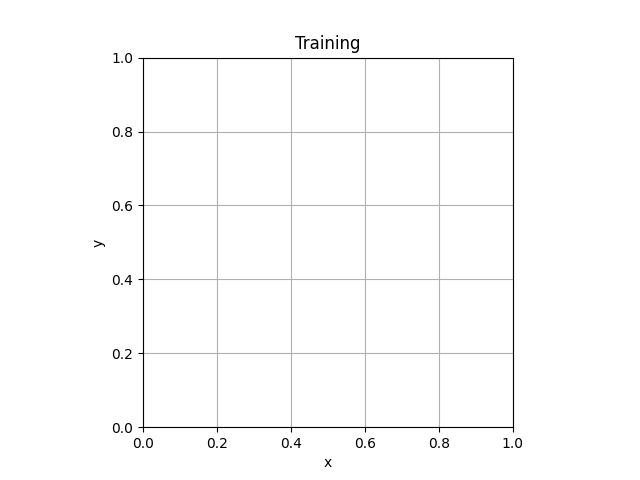

In [11]:
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = np.zeros((100, 100))

def animate(i):
    global w1, b1, wOut, counter
    for i in range(1):
        w1, wOut, b1 = update_weights(xdata, w1, wOut, b1, 0.003)
    ax.clear()
    counter += 1
    #plot contour

    for i in range(100):
        for j in range(100):
            Z[i, j] = output(np.array([X[i, j], Y[i, j]]), w1, wOut, b1)
    ax.pcolor(X, Y, Z, cmap='RdBu', vmin=-1, vmax=1)
    ax.scatter(xdata[0], xdata[1], c=np.sign(xdata[0]*xdata[1]))

    ax.set_title("loss: " + str(loss(xdata, w1, wOut, b1)))


# plot data while training
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_aspect('equal')
ax.grid()
ax.set_title('Training')
ax.set_xlabel('x')
ax.set_ylabel('y')
ani = animation.FuncAnimation(fig, animate, frames=100, interval=3, repeat=False)
plt.show()
# fn = 'neuro'
# ani.save(fn+'.gif',writer='ffmpeg')
# plt.rcParams['animation.html'] = 'html5'
# ani

